## Analyzing Weather Data using Python

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
data = pd.read_csv("DailyDelhiClimateTrain.csv")
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
meantemp,1462.0,25.495521,7.348103,6.000000,18.857143,27.714286,31.305804,38.714286
humidity,1462.0,60.771702,16.769652,13.428571,50.375000,62.625000,72.218750,100.000000
wind_speed,1462.0,6.802209,4.561602,0.000000,3.475000,6.221667,9.238235,42.220000
meanpressure,1462.0,1011.104548,180.231668,-3.041667,1001.580357,1008.563492,1014.944901,7679.333333


The date column in this dataset is not having a datetime data type. We will change it when required. Let’s have a look at the mean temperature in Delhi over the years

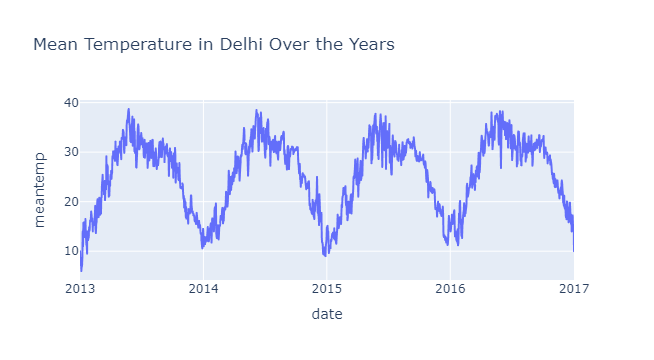

In [22]:
fg = px.line(data, 
             x="date",
             y="meantemp",
             title="Mean Temperature in Delhi Over the Years")
fg.show()

Now let’s have a look at the humidity in Delhi over the years:

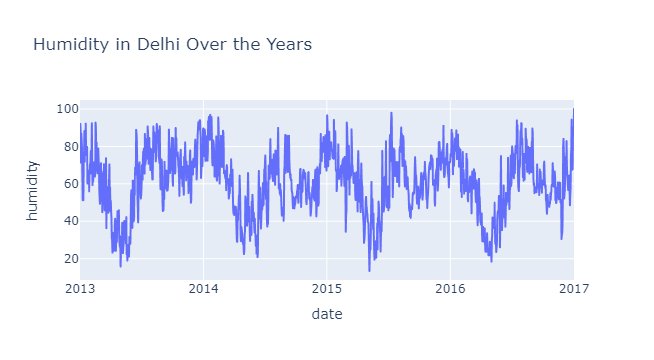

In [28]:
fg = px.line(data,
            x="date",
            y="humidity",
            title =" Humidity in Delhi Over the Years")
fg.show()

Now let’s have a look at the wind speed in Delhi over the years:

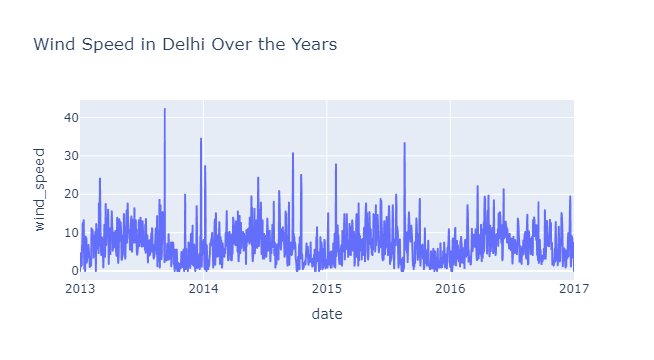

In [31]:
fg = px.line(data,
             x="date",
             y="wind_speed",
             title="Wind Speed in Delhi Over the Years")
fg.show()

Till 2015, the wind speed was higher during monsoons (August & September) and retreating monsoons (December & January). After 2015, there were no anomalies in wind speed during monsoons

Now let’s have a look at the relationship between temperature and humidity:

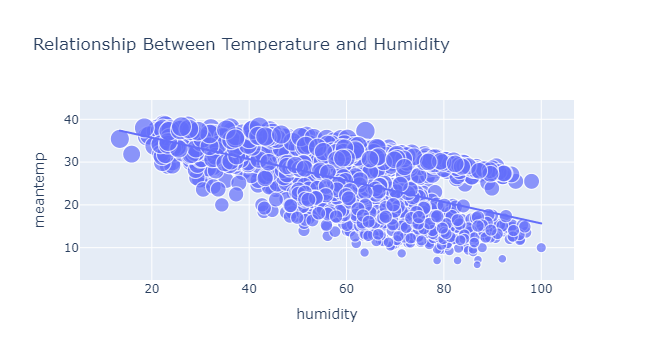

In [39]:
fg = px.scatter(data_frame=data,
                x='humidity',
                y='meantemp',
                size='meantemp',
                trendline='ols',
                title='Relationship Between Temperature and Humidity')
fg.show()

There’s a negative correlation between temperature and humidity in Delhi. It means higher temperature results in low humidity and lower temperature results in high humidity.

## Analyzing Temperature Change
Now let’s analyze the temperature change in Delhi over the years. For this task, I will first convert the data type of the date column into datetime. Then I will add two new columns in the dataset for year and month values.

In [45]:
data['date'] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data["year"] = data['date'].dt.year
data['month'] = data['date'].dt.month
data.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


Now let’s have a look at the temperature change in Delhi over the years:

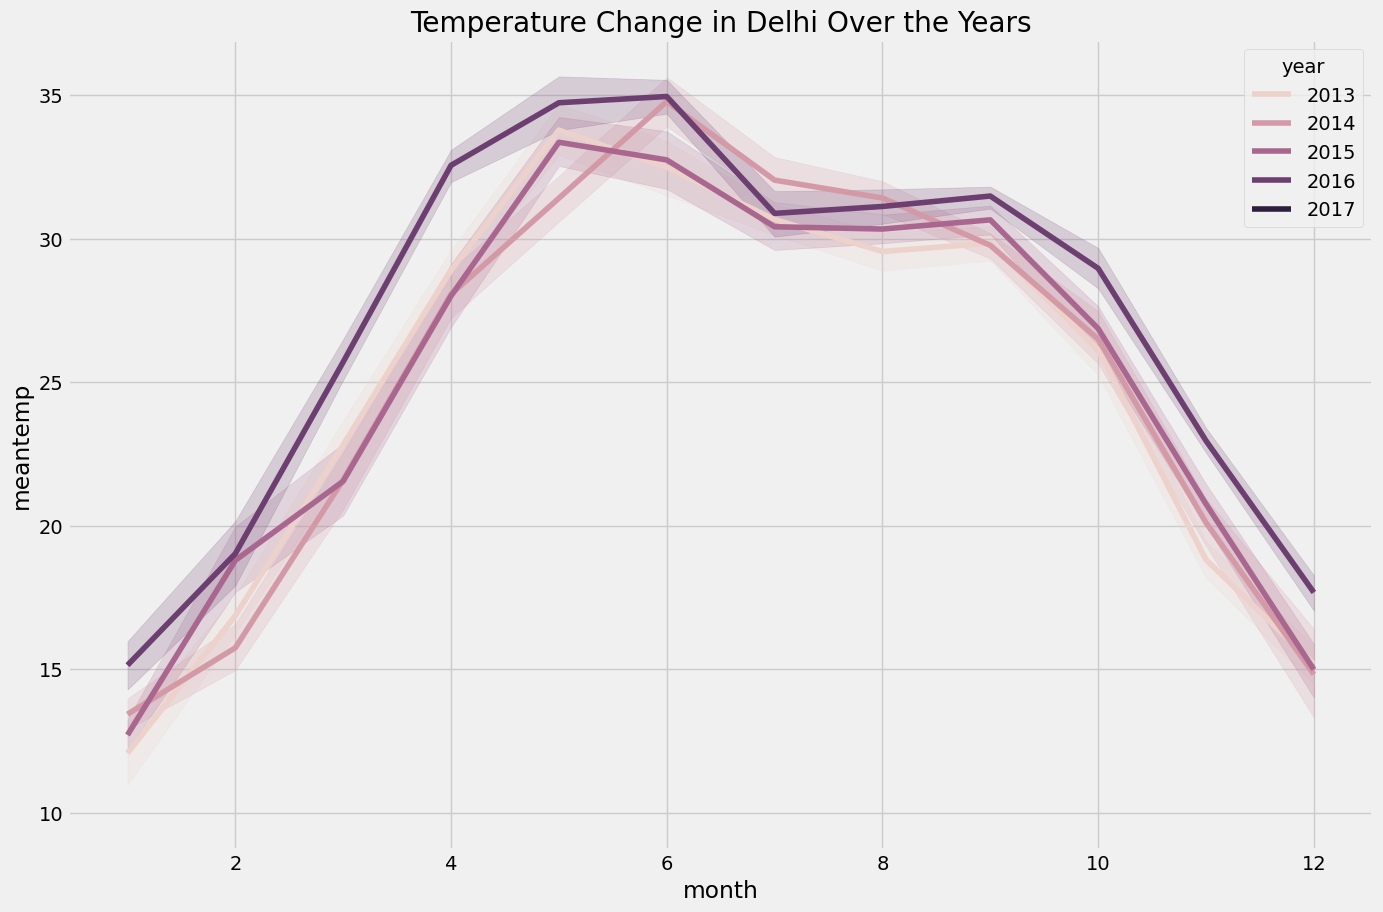

In [52]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.title('Temperature Change in Delhi Over the Years')
sns.lineplot(data = data, x= 'month', y='meantemp', hue='year')
plt.show()

Although 2017 was not the hottest year in the summer, we can see a rise in the average temperature of Delhi every year.

Now let’s move to the task of weather forecasting. I will be using the Facebook prophet model for this task. The Facebook prophet model is one of the best techniques for time series forecasting

Data Format:
Prophet model requires two main columns:

1. ds: Column containing time information. It should contain date and time information. Timestamps are located in this column.
2. y: Column containing the values ​​to be predicted. These are the observations of the time series and represent the variable to be predicted.

In [56]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 991.0 kB/s eta 0:00:14
    --------------------------------------- 0.2/13.3 MB 2.1 MB/s eta 0:00:07
   - -------------------------------------- 0.5/13.3 MB 3.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.9/13.3 MB 4.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.5/13.3 MB 6.3 MB/s eta 0:00:02
   ------ --------------------------------- 2.1/13.3 MB 7.3 MB/s eta 0:00:02
   ------- -------------------------------- 2.7/13.3 MB 8.1 MB/s eta 0:00:02
   --------- ------------------------------ 3.2/13.3 MB 8.6 MB/s eta 0:00:02
   ----------- ---------------------------- 3.8/13.3 MB 9.4 MB/s eta 0:00:02
   ------------- -------------------------- 4.4/13.3 MB 9.7 MB/s eta 0:00:01
   --------------- ------------------------ 5.0/13.3 MB 10.0 MB/s eta 0:00:01
   ---------------- ----------------------- 5.6/13.3 MB 10.2 MB/s eta 0:00:01
  

In [59]:
forecast_data=data.rename(columns = {"date":"ds",
                                    "meantemp":"y"})
print(forecast_data)

             ds          y    humidity  wind_speed  meanpressure  year  month
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667  2013      1
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000  2013      1
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667  2013      1
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667  2013      1
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000  2013      1
...         ...        ...         ...         ...           ...   ...    ...
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217  2016     12
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762  2016     12
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762  2016     12
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000  2016     12
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000  2017      1

[1462 rows x 7 columns]


11:30:30 - cmdstanpy - INFO - Chain [1] start processing
11:30:31 - cmdstanpy - INFO - Chain [1] done processing


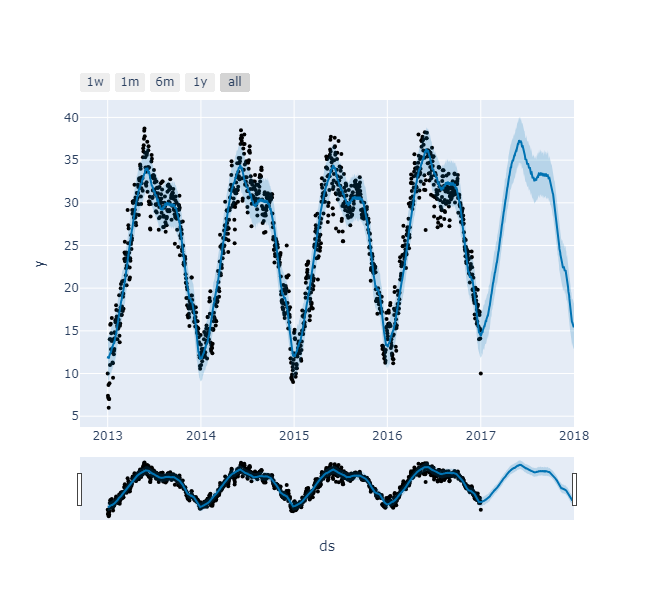

In [65]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)